# Course 1: Classification and Vector Spaces
# Week 3: Another explanation about PCA

In this lab, we are going to view another explanation about Principal Component Analysis(PCA). PCA is a statistical technique invented in 1901 by Karl Pearson that uses orthogonal transformations to map a set of variables into a set of linearly uncorrelated variables called Principal Components.

PCA is based on the Singular Value Decomposition(SVD) of the Covariance Matrix of the original dataset. The Eigenvectors of such decomposition are used as a rotation matrix. The Eigenvectors are arranged in the rotation matrix in decreasing order according to its explained variance. This last term is related to the EigenValues of the SVD.

PCA is a potent technique with applications ranging from simple space transformation, dimensionality reduction, and mixture separation from spectral information.

Follow this lab to view another explanation for PCA. In this case, we are going to use the concept of rotation matrices applied to correlated random data, just as illustrated in the next picture.

Source: https://en.wikipedia.org/wiki/Principal_component_analysis

In [48]:
import numpy as np                         # Linear algebra library
import matplotlib.pyplot as plt            # library for visualization
from sklearn.decomposition import PCA      # PCA library
import pandas as pd                        # Data frame library
import math                                # Library for math functions
import random                              # Library for pseudo random numbers

To start, let us consider a pair of random variables x, y. Consider the base case when y = n * x. The x and y variables will be perfectly correlated to each other since y is just a scaling of x.



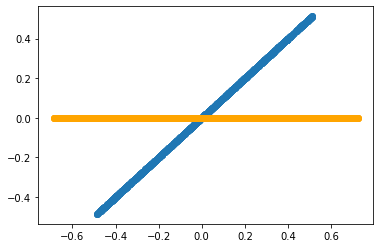

In [49]:
# Amount of correlation
n = 1
# 1000 uniform samples from 1 to 2
x = np.random.uniform(1, 2, 1000)
y = x.copy()

# PCA works better if the data is centered
x = x - np.mean(x)
y = y - np.mean(y)

# Convert to dataframe
data = pd.DataFrame({'x': x, 'y': y})
plt.scatter(data.x, data.y)

# Initialize a PCA. We choose 2 output variables
pca = PCA(n_components=2)

# Create a transformation model for this data.
# It gets the rotatio matrix and the explained variance
pcaTr = pca.fit(data)

# Transform the data base on the rotation matrix
rotatedData = pcaTr.transform(data)
# Create a df with the new variables. We will call these PC1 and PC2
dataPCA = pd.DataFrame(data = rotatedData, columns = ['PC1', 'PC2'])

# Plot the transformed data in orange
plt.scatter(dataPCA['PC1'], dataPCA['PC2'], c='orange')
plt.show()

## Understanding the transformation model pcaTr

As mentioned before, a PCA model is composed of a rotation matrix and its corresponding explained variance. In the next module, we will explain the details of the rotation matrices.

- pcaTr.components_ has the rotation matrix
- pcaTr.explained_variance_ has the explained variance of each principal component

In [50]:
print("Eigenvectors or principal components: first row must be in the direction of  [1, n]")
print(pcaTr.components_)

print("Eigenvalues or explained variance")
print(pcaTr.explained_variance_)

Eigenvectors or principal components: first row must be in the direction of  [1, n]
[[ 0.70710678  0.70710678]
 [-0.70710678  0.70710678]]
Eigenvalues or explained variance
[1.69244375e-01 5.38694559e-33]


In [51]:
# Print cosine of 45
print("Cosine of 45: ", math.cos(math.radians(45)))

Cosine of 45:  0.7071067811865476


We can see that the rotation matrix is composed of cosines and sines of 45º.
45º is the same angle that form the variable y = 1*x.

The PCA has identified the angle in which point the original variables.

The explained variance is around [0.166, 0]. Remember that the variance of a uniform random variable is x ~ U(1, 2),
which is equal to:

Var(x) = ((2 - 1)^2)/12 = 0.083333


Then, the explained variance given by the PCA is:

[Var(x) + Var(y), 0] = [0.083333 + 0.083333, 0] = [0.166, 0]

## Correlated Normal Random Variables.

Now, we will use a controlled dataset composed of 2 random variables with different variances and with a specific Covariance among them. The only way I know to get such a dataset is, first, create two independent Normal random variables with the desired variances and then combine them using a rotation matrix. In this way, the new resulting variables will be a linear combination of the original random variables and thus be dependent and correlated.

Angles:  45.0
Rotation matrix:  [[ 0.70710678  0.70710678]
 [-0.70710678  0.70710678]]


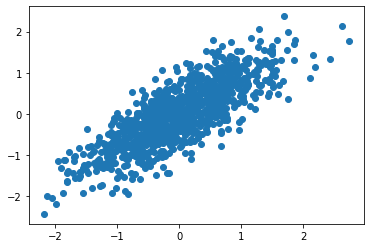

In [52]:
import matplotlib.lines as mlines
import matplotlib.transforms as mtransforms

random.seed(100)

# Create 2 sd's of normal distribution
std1 = 1
std2 = 0.333

# 1000 samples for x in N(0, std1) and y in N(0, std2)
x = np.random.normal(0, std1, 1000)
y = np.random.normal(0, std2, 1000)

# Center the data
x = x - np.mean(x)
y = y - np.mean(y)

# Covariance magnitude
n = 1
# Conver the variance to an angle
angle = np.arctan(1/n)
print("Angles: ", math.degrees(angle))

# Create a rotation matrix using the given angle. Use numpy
rotationMatrix = np.array([[np.cos(angle), np.sin(angle)], [-np.sin(angle), np.cos(angle)]])
print("Rotation matrix: ", rotationMatrix)

# Create a matrix with columns x and y 
xy = np.concatenate(([x], [y]), axis=0).T

# Transform the data using the rotation matrix.
# It correlates the two variables
data = np.dot(xy, rotationMatrix)

# Plot the rotated data
plt.scatter(data[:, 0], data[:, 1])
plt.show()

Let us print the original and the resulting transformed system using the result of the PCA in the same plot alongside with the 2 Principal Component vectors in red and blue



Eigenvectors
[[ 0.71593175  0.69817028]
 [ 0.69817028 -0.71593175]]
Eigenvalues
[1.07159961 0.11255613]


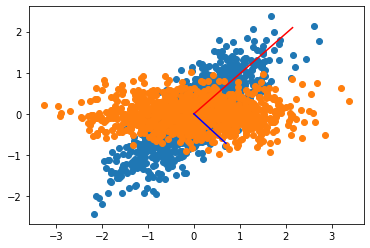

In [53]:
plt.scatter(data[:, 0], data[:, 1])

# Apply PCA. In theory the Eigenvector matrix must be the 
# inverse of the original rotationMatrix

pcaTr = pca.fit(data)
dataPCA = pcaTr.transform(data)

print("Eigenvectors")
print(pcaTr.components_)
print("Eigenvalues")
print(pcaTr.explained_variance_)

# Plot the rotated data
plt.scatter(dataPCA[:, 0], dataPCA[:, 1])

# Plot the first component axe.
plt.plot([0, pcaTr.components_[0, 0] * std1 * 3], [0, pcaTr.components_[0, 1] * std1 * 3], c='r')
# Plot the second component axe.
plt.plot([0, pcaTr.components_[1, 0] * std2 * 3], [0, pcaTr.components_[1, 1] * std2 * 3], c='b')

The explanation of this chart is as follows:

- The rotation matrix used to create our correlated variables took the original uncorrelated variables x and y and transformed them into the blue points.
- The PCA transformation finds out the rotation matrix used to create our correlated variables (blue points). Using the PCA model to transform our data, puts back the variables as our original uncorrelated variables.
- The explained Variance of the PCA is [0.9965, 0.1086] which
is approximately
[1, 0.333 * 0.333] = [std1, std2]

## PCA as a strategy for dimensionality reduction

The principal components contained in the rotation matrix, are decreasingly sorted depending on its explained Variance. It usually means that the first components retain most of the power of the data to explain the patterns that generalize the data. Nevertheless, for some applications, we are interested in the patterns that explain much less Variance, for example, in novelty detection.

In the next figure, we can see the original data and its corresponding projection over the first and second principal components. In other words, data comprised of a single variable.

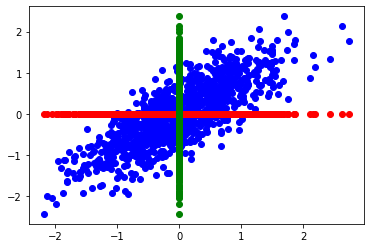

In [54]:
nPoints = len(data)

# Plot the original data in blue
plt.scatter(data[:, 0], data[:, 1], c='b')

# Plot the projection along the first component axe.
plt.scatter(data[:, 0], np.zeros(nPoints), c='r')
# Plot the projection along the second component axe.
plt.scatter(np.zeros(nPoints), data[:, 1], c='g')